# Prediction using Supervised ML using R

 **Simple Linear Regression**

It is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables. One variable denoted x is regarded as an independent variable and other one denoted y is regarded as a dependent variable. It is assumed that the two variables are linearly related. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).


In this regression task we will **predict the percentage of marks that a student is expected to score based upon the number of hours they studied.** This is a simple linear regression task as it involves just two variables.

In [1]:
# load the required packages.
library(ggplot2)                        # Library to create some nice looking graphs.


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
# Importing the dataset

dataset = "http://bit.ly/w-data"
data = read.csv(dataset)

**Do some data exploration**

In [3]:
#Inspect and summarize the data.
head(data,5)

Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30


In [4]:
str(data)

'data.frame':	25 obs. of  2 variables:
 $ Hours : num  2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 ...
 $ Scores: int  21 47 27 75 30 20 88 60 81 25 ...


In [5]:
summary(data)

     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

In [6]:
my_list1 <- list(data$Scores)            # Convert score column to list element
my_list1                                 # Print list

[[1]]
 [1] 21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76 86

In [7]:
unique(data['Hours'])                   #Unique values in Hours Column

,Hours
1,2.5
2,5.1
3,3.2
4,8.5
5,3.5
6,1.5
7,9.2
8,5.5
9,8.3
10,2.7


**Let us have a look at how each variable is distributed. Below is the histogram of hours:**

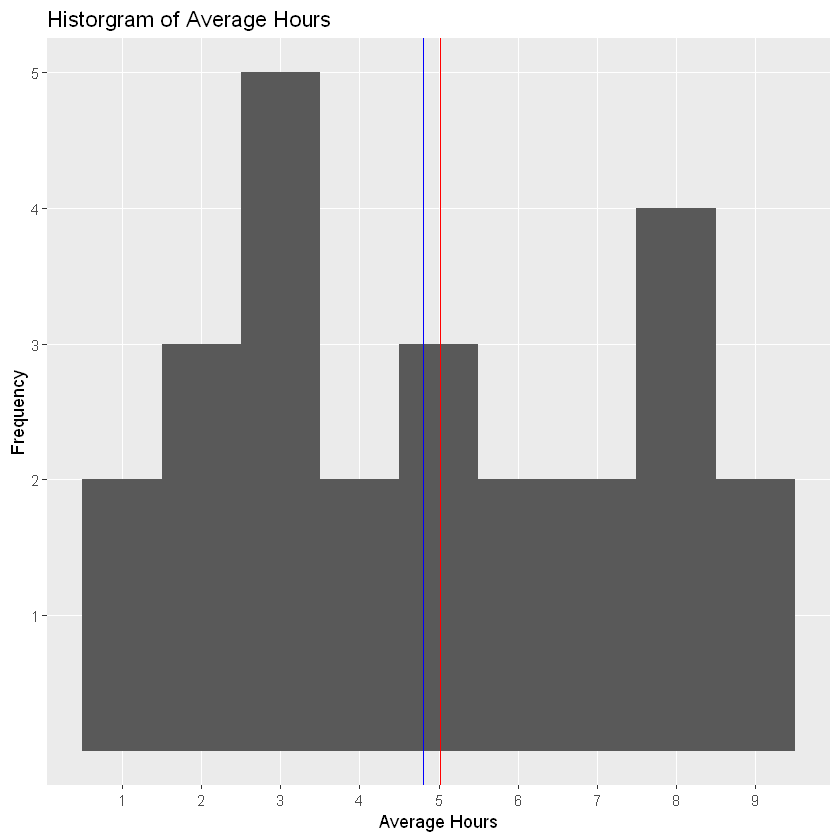

In [8]:
# Histogram of the variable Hours.
qplot(Hours, data = data, geom="histogram", binwidth=1) +
  labs(title = "Historgram of Average Hours") +
  labs(x ="Average Hours") +
  labs(y = "Frequency") +
  scale_y_continuous(breaks = c(1:20), minor_breaks = NULL) +
  scale_x_continuous(breaks = c(1:10), minor_breaks = NULL) +
   geom_vline(xintercept = mean(data$Hours), show.legend=TRUE, color="red") +
  geom_vline(xintercept = median(data$Hours), show.legend=TRUE, color="blue")

The histogram above allows us to see the pattern in the distribution of average hours spend on studies in the dataset. The blue vertical line shows the median value and the red line the average value.

**Let’s now plot the histogram of Scores**

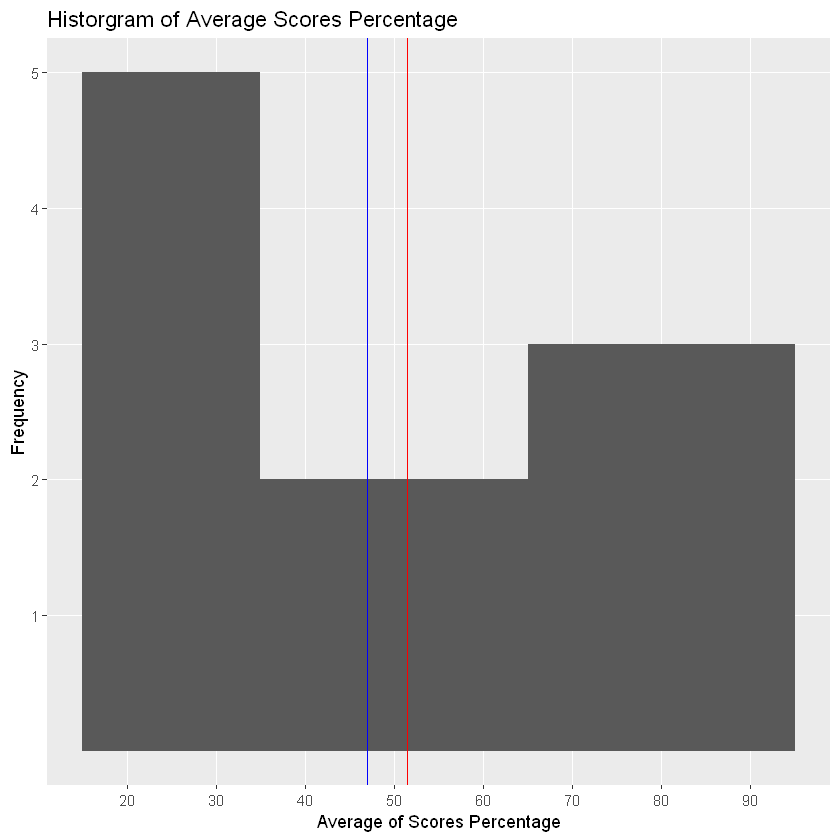

In [9]:
# Histogram of the variable Scores.
qplot(Scores, data = data, geom="histogram", binwidth=10) +
  labs(title = "Historgram of Average Scores Percentage") +
  labs(x ="Average of Scores Percentage") +
  labs(y = "Frequency") +
  scale_y_continuous(breaks = c(1:25), minor_breaks = NULL) +
  scale_x_continuous(breaks = c(0,10,20,30,40,50,60,70,80,90,100), minor_breaks = NULL) +
  geom_vline(xintercept = mean(data$Scores), show.legend=TRUE, color="red") +
  geom_vline(xintercept = median(data$Scores), show.legend=TRUE, color="blue")

The histogram above shows the pattern in the distribution of average scores. The blue vertical line shows the median value and the red line the average value.

**Draw a scatterplot of both variables to see their relationship:**

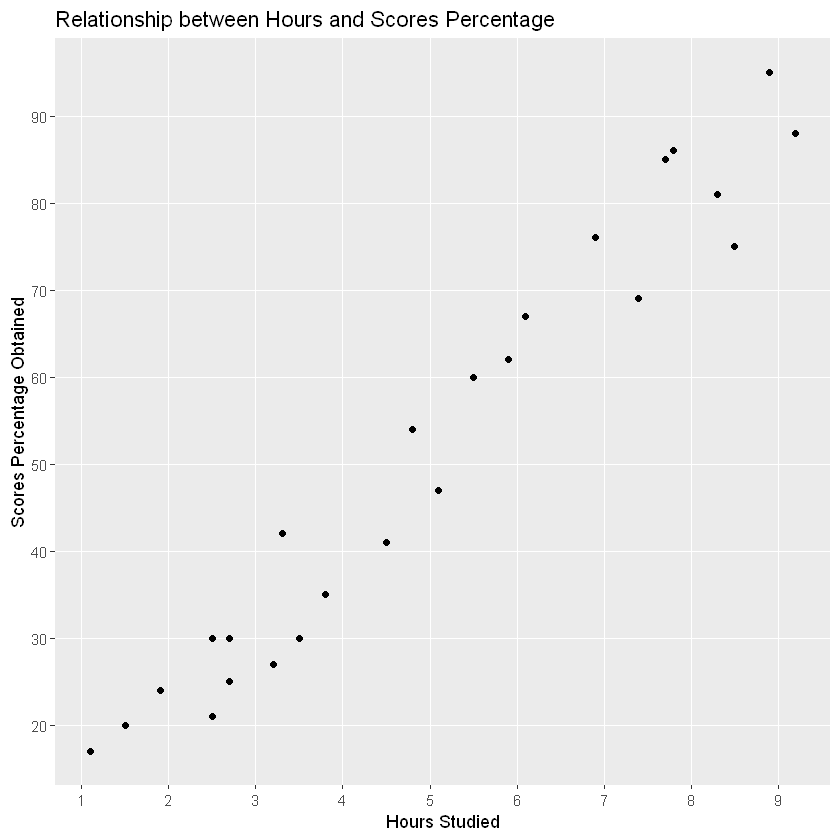

In [10]:
# Create a plot of the subset data.
qplot(Hours, Scores, data = data, main = "Relationship between Hours and Scores Percentage") +
  labs(x ="Hours Studied") +
  labs(y = "Scores Percentage Obtained") +
  scale_y_continuous(breaks = c(10,20,30,40,50,60,70,80,90,100), minor_breaks = NULL) +
  scale_x_continuous(breaks = c(1:10), minor_breaks = NULL)

 Observe how hours studied increases, scores obtained is increasing. From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
# Splitting the dataset into the
# Training set and Test set
install.packages('caTools')
library(caTools)
split = sample.split(data$Scores, SplitRatio = 0.7)
trainingset = subset(data, split == TRUE)
testset = subset(data, split == FALSE)

package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Anita George\AppData\Local\Temp\Rtmpi6bAsS\downloaded_packages


Warning message:
"package 'caTools' was built under R version 3.6.3"

In [12]:
# Fitting Simple Linear Regression to the Training set

lm.r= lm(formula = Scores ~ Hours,
                        data = trainingset)
coef(lm.r)

(Intercept)       Hours 
   2.835358    9.542210

In [13]:
# Predicting the Test set results
ypred = predict(lm.r, newdata = testset)

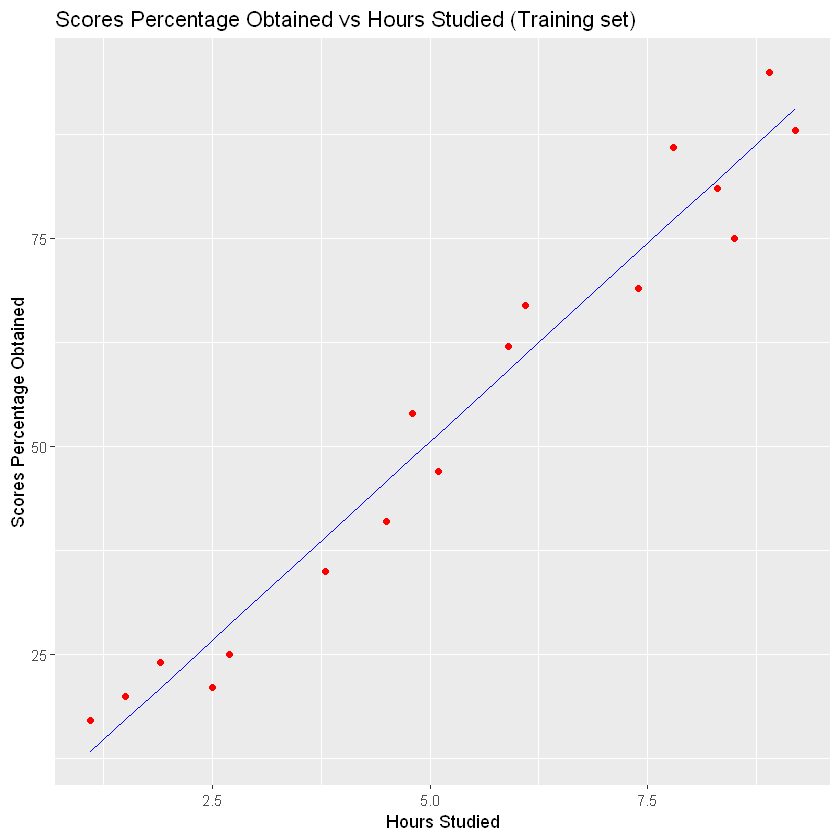

In [14]:
# Visualising the Training set results
ggplot() + geom_point(aes(x = trainingset$Hours, 
                y = trainingset$Scores), colour = 'red') +
geom_line(aes(x = trainingset$Hours,
y = predict(lm.r, newdata = trainingset)), colour = 'blue') +
          
ggtitle('Scores Percentage Obtained vs Hours Studied (Training set)') +
xlab('Hours Studied') +
ylab('Scores Percentage Obtained')

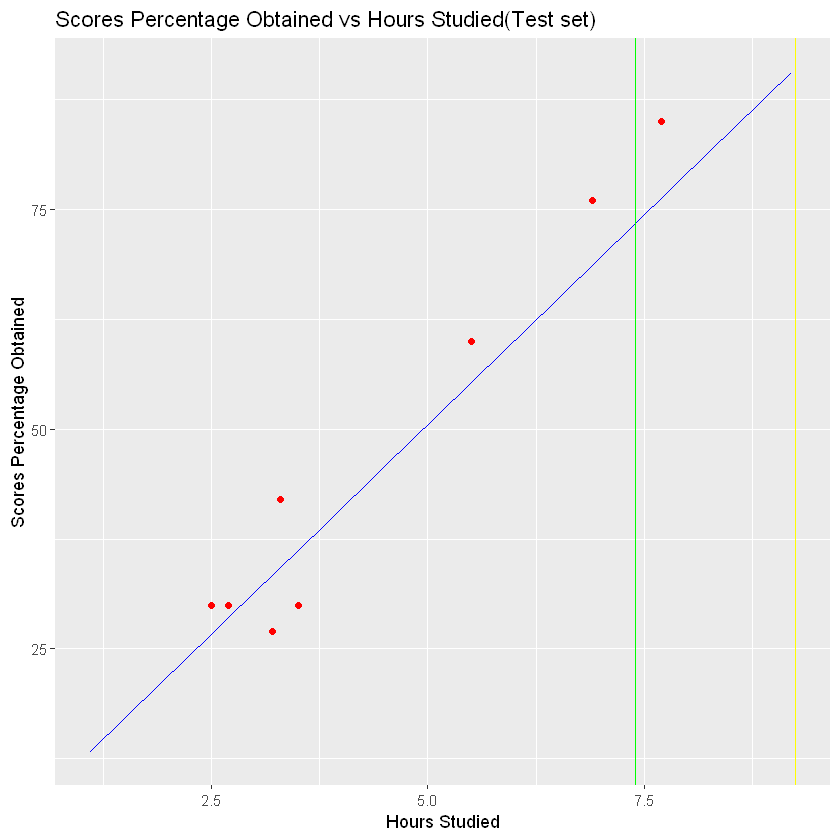

In [25]:
# Visualising the Test set results
  ggplot() +
  geom_point(aes(x = testset$Hours, y = testset$Scores),
             colour = 'red') +
  geom_line(aes(x = trainingset$Hours,
             y = predict(lm.r, newdata = trainingset)), 
             colour = 'blue') +
   geom_vline(xintercept = 7.4, show.legend=TRUE, color="green") +       
   geom_vline(xintercept = 9.25, show.legend=TRUE, color="yellow") +     
  ggtitle('Scores Percentage Obtained vs Hours Studied(Test set)') +
  xlab('Hours Studied') +
  ylab('Scores Percentage Obtained')

**Calculating the correlation between Scores and Hours Studied**

We can also verify our above analysis that there is a correlation between Scores and Hours by taking the help of cor( ) function in R which is used to calculate the correlation between two variables.

In [16]:
cor(data$Scores,data$Hours)

[1] 0.9761907

**Creating a Linear regression model**

Now with the help of lm( ) function, we are going to make a linear model. lm( ) function has two attributes first is a formula where we will use “data ~ Scores” because Scores is an dependent variable and Hours Studied is a independent variable and the second is data, where we will give the name of the data frame containing data which is in this case, is data frame 'data'.

In [17]:
model <- lm(Scores ~ Hours, data = data)

**Summary of our linear regression model**

In [18]:
summary(model)


Call:
lm(formula = Scores ~ Hours, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.578  -5.340   1.839   4.593   7.265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4837     2.5317   0.981    0.337    
Hours         9.7758     0.4529  21.583   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.603 on 23 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9509 
F-statistic: 465.8 on 1 and 23 DF,  p-value: < 2.2e-16


**Interpretation of the model**

In [19]:
#Coefficients:
#            Estimate   Std. Error t value Pr(>|t|)    
#(Intercept)   2.4837     2.5317   0.981    0.337    
#Hours         9.7758     0.4529  21.583   <2e-16 

#Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

#S0 = 2.4837 (Y- intercept)
#S1 = 9.7758 (Hours coefficient)
#SCORES OBTAINED = 2.4837 + 9.7758 Hours

It means a change in one unit in Hours Studied will bring 9.7758 units to change in Scores Percentage Obtained.

**Creating data frame for predicting values**

Creating a data frame which will store hours studied as 7.4 hrs. And this data frame will be used to predict scores obtained at 7.4 hrs studied after creating a linear regression model.

In [20]:
p <-  as.data.frame(7.4)
colnames(p) <- "Hours"

**Predict the value of Scores Percentage Obtained at Hours studied was 7.4**

In [21]:
predict(model, newdata = p)

1 
74.82462

So, the predicted value of scores percentage obtained is 74.8 at 7.4 hrs of study

 **What will be predicted score if a student studies for 9.25 hrs/ day?**

In [23]:
p <-  as.data.frame(9.25)
colnames(p) <- "Hours"

In [24]:
predict(model, newdata = p)

1 
92.90985

**So, the predicted value of scores percentage obtained is 92.9 at 9.25 hrs of study**